<a href="https://colab.research.google.com/github/smruthyunjaya/levisTakeHomeAssignment/blob/dev/levisAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Levis Take Home Assignment

 # Git setup

In [28]:
!git clone -b dev https://github.com/smruthyunjaya/levisTakeHomeAssignment.git
!cd levisTakeHomeAssignment/



fatal: destination path 'levisTakeHomeAssignment' already exists and is not an empty directory.


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('/content/levisTakeHomeAssignment/'))

In [30]:
from data_utils.DataLoader import DataLoader

In [31]:
dl = DataLoader('https://docs.google.com/spreadsheets/d/e/2PACX-1vSag0RkuAVTVHmtxQHPAPc-6EGGKzWF9bkVq0xiH2AnyUcy_7VQwZGm-TFWZSVvxTlOFL3N1rYXTx5S/pub?gid=646522252&single=true&output=tsv')
dl.print_summary()
df = dl.df

(10127, 21)
          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%

# Drop CLIENTNUM column because Client number is unique identifier of account holder. This feature doesn't really effect the attrition  prediction.

In [32]:
df.drop(['CLIENTNUM'], inplace=True, axis=1)

In [33]:
# Checking to see if the column CLIENTNUM was dropped. 
df.shape

(10127, 20)

# Drop null or incorrect values (if any)

Check for any null values

In [34]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are no null values in the dataset which is good.

# Check for duplicates

In [35]:
df.duplicated().sum()

0

There are no duplicates

# Identify categorical features and apply one hot encoding and ordinal encoding

In [36]:
categorical_columns = df.columns[df.dtypes == 'object']
categorical_columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [37]:
df["Attrition_Flag"] = df["Attrition_Flag"].map({'Existing Customer':0, 'Attrited Customer':1})

In [38]:
df["Gender"] = df["Gender"].map({'M':0, 'F':1})

In [39]:
df["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [40]:
education_mappping = {
    "Uneducated":0,
    "High School":1,
    "Graduate": 2,
    "College": 3,
    "Post-Graduate":4,
    "Doctorate":5,
    "Unknown": -9
}
df["Education_Level"] = df["Education_Level"].map(education_mappping)

In [41]:
df["Marital_Status"].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [42]:
df["Marital_Status"] = df["Marital_Status"].map({'Married':1, 'Single':0, 'Unknown':-99, 'Divorced':2})

In [43]:
df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [44]:
earning_map = {
    '$60K - $80K':2, 'Less than $40K':0, '$80K - $120K':3, '$40K - $60K':1,
       '$120K +':4, 'Unknown':-999
}
df["Income_Category"] = df["Income_Category"].map(earning_map)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


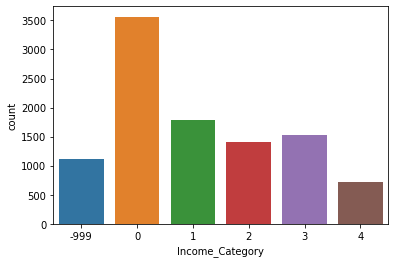

In [45]:
sns.countplot('Income_Category', data=df)

In [46]:
df["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [47]:
df["Card_Category"] = df["Card_Category"].map({'Blue':0, 'Gold':2, 'Silver':1, 'Platinum':3})

# Drop all the high correlated columns with the Attrition Flag column (if any)

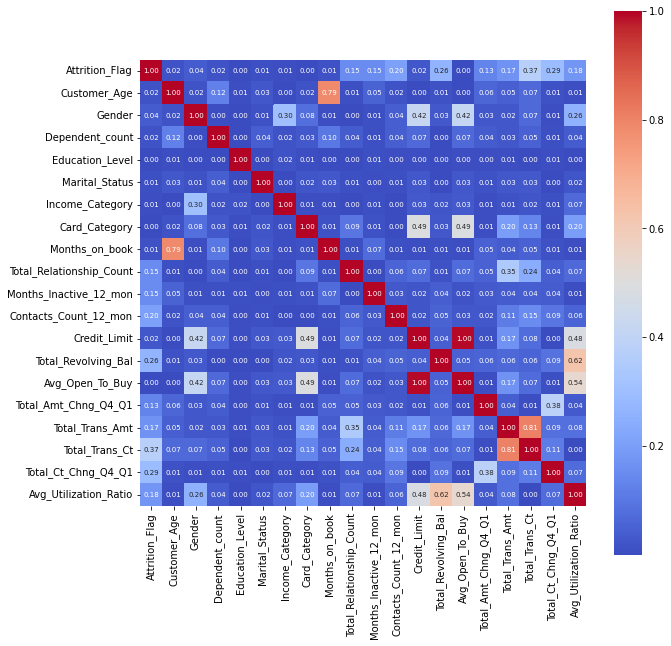

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
corr = df.corr()
#sns.heatmap(corr.abs(), xticklabels=corr.columns,yticklabels=corr.columns, annot=True, square=True)
sns.heatmap(corr.abs(), vmax = 1.0, square=True,annot=True, fmt= '.2f', cbar=True, annot_kws={'size': 7}, cmap="coolwarm");

In [49]:
## dropping the features that are highly correlated with attrition column
highly_correlated_features = df.corr().Attrition_Flag[df.corr().Attrition_Flag>=0.7].index
print (highly_correlated_features)

Index(['Attrition_Flag'], dtype='object')


# A visual inspection of the heatmap shows that not many features are highly correlated with Attrition_Flag. Although I would like to say that the features Total_trans_ct and Total trans ct shows some correlation with Attrition_Flag. However I am going to not drop any of these features and retain them. I have used 0.7 as the threshold here to weed out highly correlated features wrt Attrition_flag. However there are none that meet the threshold.

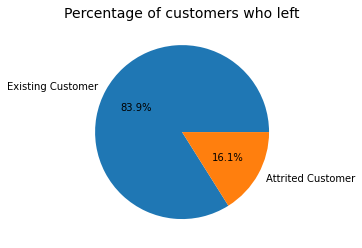

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [50]:
t = df["Attrition_Flag"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(t, labels=['Existing Customer', 'Attrited Customer'], autopct='%1.1f%%', shadow=None)
plt.title("Percentage of customers who left", fontsize=14)
plt.show()
df["Attrition_Flag"].value_counts()


# Dataset is imbalanced as the number of samples of existing customers are more than the customers who have left. If i were to use this dataset for model training, I would upsample the minority class or downsample the majority class so as to balance the classes. There is also a technique called SMOTE (Synthetic Minority Oversampling Technique) that will generate new samples from the existing minority class.

# Outlier Detection

To detect outliers, I plotted the box plot for all the numerical features.

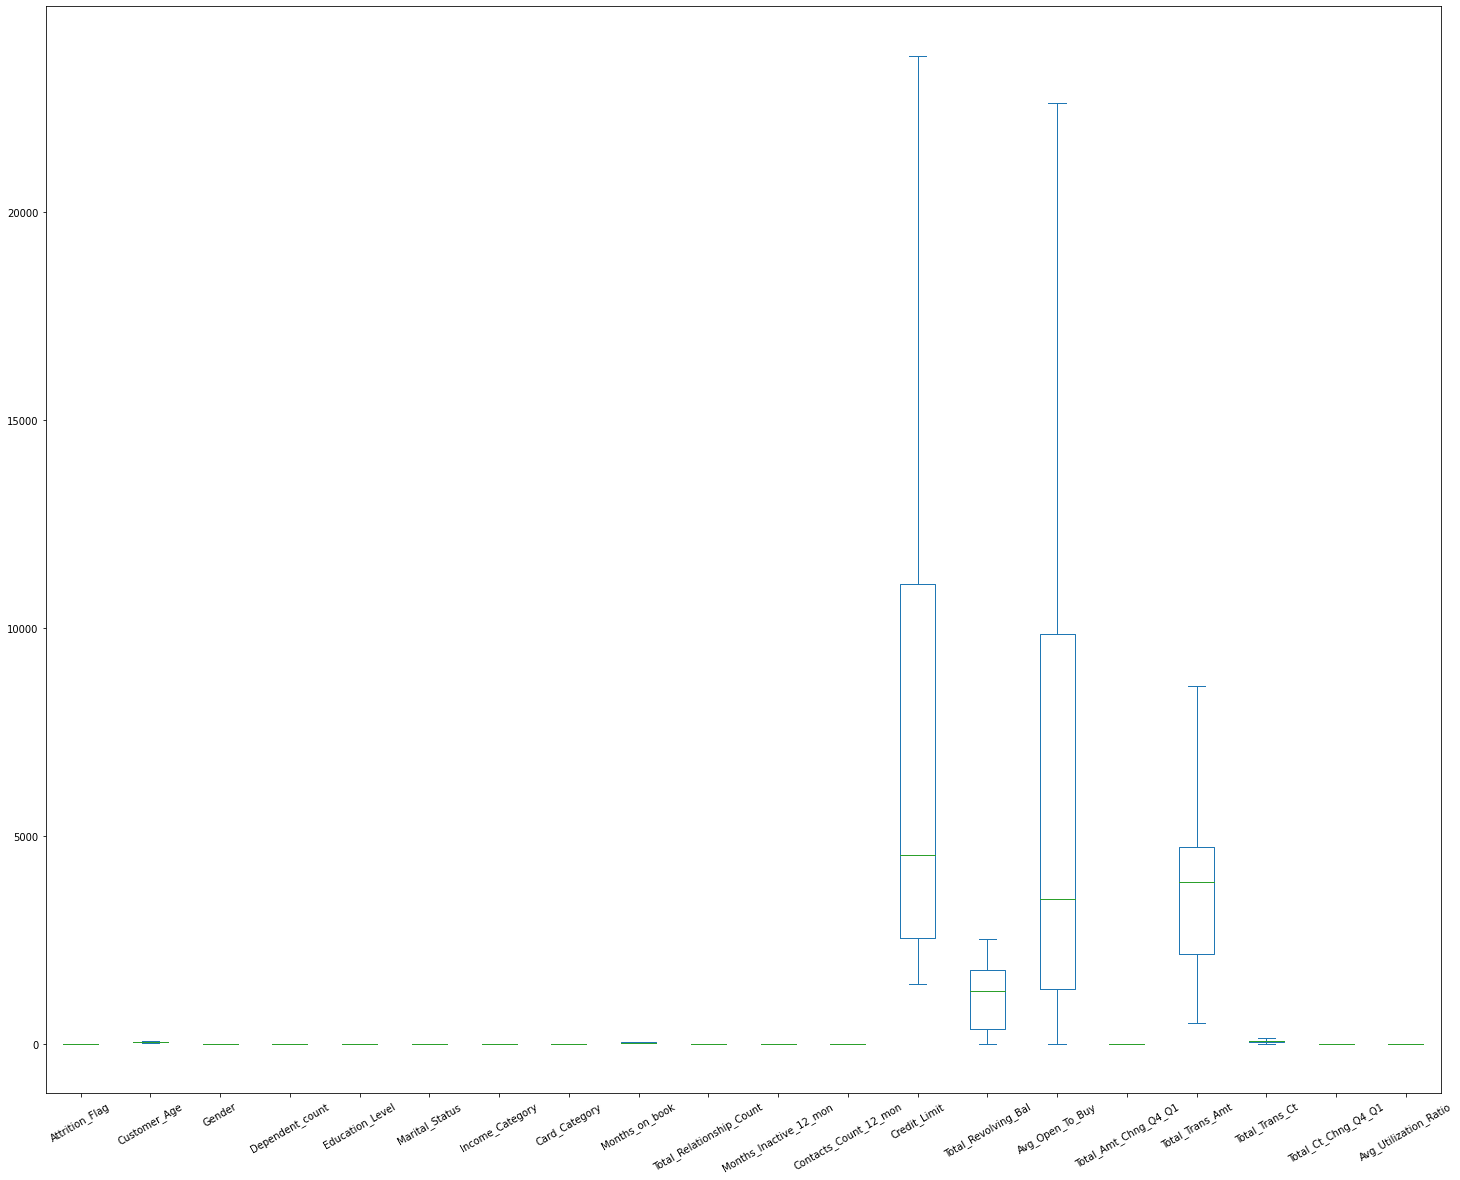

In [51]:
df.plot(kind='box', figsize = (25,20), rot=30, showfliers=False);

['Attrition_Flag']


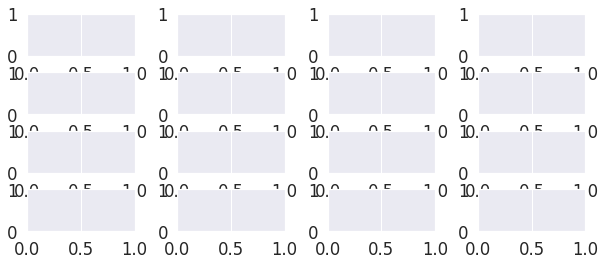

In [56]:
#fig = plt.figure(figsize=(14, 4))
sns.set(font_scale=1.5)
numeric_columns = df.select_dtypes(include=['int64']).columns.tolist()
print(numeric_columns)

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i,var in enumerate(list(numeric_columns)):
    if var == "Attrition_Flag":
      continue
    #ax = fig.add_subplot(nrows, ncols, i+1)
    ax = sns.boxplot(data=df, x='Attrition_Flag', y=var)
    ax.set_title(var)

# Outlier detection using Interquartile range. 75%-25% values Calculate the lower and upper bound. Anything that lies below lower bound and above upper is an outlier By using IQR method to eliminate outliers, I was loosing 30% of the data. So I decided to use the IQR to extract the lower and upper bound and then perform quantile based flooring and capping. Basically, if the feature value is lesser than the lower bound, then set it to the lower bound, if the feature value is higher than the higher bound, then set it to the higher bound.

In [53]:
for ft in numeric_columns:
  if ft  == "Attrition_Flag": 
    continue
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (3 * IQR)
  higher_bound = Q3 + (3 * IQR)
  print("Feature =", ft, "lower quartile=", Q1, "upper quartile=", Q3, "IQR=", IQR, "lower bound=", lower_bound, "higher_bound=", higher_bound)
  df[ft] = np.where(df[ft] < lower_bound, lower_bound,df[ft])
  df[ft] = np.where(df[ft] > higher_bound,higher_bound ,df[ft])

Feature = Customer_Age lower quartile= 41.0 upper quartile= 52.0 IQR= 11.0 lower bound= 8.0 higher_bound= 85.0
Feature = Gender lower quartile= 0.0 upper quartile= 1.0 IQR= 1.0 lower bound= -3.0 higher_bound= 4.0
Feature = Dependent_count lower quartile= 1.0 upper quartile= 3.0 IQR= 2.0 lower bound= -5.0 higher_bound= 9.0
Feature = Education_Level lower quartile= 0.0 upper quartile= 2.0 IQR= 2.0 lower bound= -6.0 higher_bound= 8.0
Feature = Marital_Status lower quartile= 0.0 upper quartile= 1.0 IQR= 1.0 lower bound= -3.0 higher_bound= 4.0
Feature = Income_Category lower quartile= 0.0 upper quartile= 2.0 IQR= 2.0 lower bound= -6.0 higher_bound= 8.0
Feature = Card_Category lower quartile= 0.0 upper quartile= 0.0 IQR= 0.0 lower bound= 0.0 higher_bound= 0.0
Feature = Months_on_book lower quartile= 31.0 upper quartile= 40.0 IQR= 9.0 lower bound= 4.0 higher_bound= 67.0
Feature = Total_Relationship_Count lower quartile= 3.0 upper quartile= 5.0 IQR= 2.0 lower bound= -3.0 higher_bound= 11.0
Fea

In [54]:
df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.0,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.529081,2.346203,0.643132,0.388664,0.536684,0.0,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4241.487953,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,3.041426,1.128265,2.628490,0.0,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,2905.374318,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,-6.000000,-3.000000,-6.000000,0.0,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.0,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.0,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,5.000000,2.000000,4.000000,0.0,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,12497.500000,139.000000,3.714000,0.999000


## Attention @Pablo:

#If the assignment had not asked to drop features highly correlated with Atttrition_Flag, I would reduce the feature size as follows: i would drop the columns months_on_book, Total_Trans_Amt and Avg_open_to_Buy as they are highly corelated with Customer_Age, Total_Trans_Ct and Credit_Limit respectively.